In [2]:
import plotly.express as px 
import pandas as pd 
import numpy as np 
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
import datetime
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
from sklearn import svm

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

from __future__ import absolute_import,division,print_function,unicode_literals

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime

import pandas as pd


mpl.rcParams['figure.figsize'] = (8,6)
mpl.rcParams['axes.grid'] = False

print("Import Succesfull")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



Import Succesfull


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Get some data
df = pd.read_excel("/content/drive/My Drive/Colab Notebooks/Tomato/Tomato_Raw data.xlsx")

In [5]:
df.head(10)

,AHMEDABAD_WholesalePrice,AHMEDABAD_RetailPrice,AHMEDABAD_Volume,AHMEDABAD_Avg. Temperature,Bengaluru_WholesalePrice,Bengaluru_RetailPrice,Bengaluru_Volume,Bengaluru_Avg. Temperature,BHOPAL_WholesalePrice,BHOPAL_RetailPrice,BHOPAL_Volume,BHOPAL_Avg. Temperature,DELHI_WholesalePrice,DELHI_RetailPrice,DELHI_Volume,DELHI _Avg. Temperature,CHENNAI_WholesalePrice,CHENNAI_RetailPrice,CHENNAI_Volume,CHENNAI_Avg. Temperature,HYDERABAD_WholesalePrice,HYDERABAD_RetailPrice,HYDERABAD_Volume,HYDERABAD_Avg. Temperature,JAIPUR_WholesalePrice,JAIPUR_RetailPrice,JAIPUR_Volume,JAIPUR_Avg. Temperature,KOLKATA_WholesalePrice,KOLKATA_RetailPrice,KOLKATA_Volume,KOLKATA_Avg. Temperature,MUMBAI_WholesalePrice,MUMBAI_RetailPrice,MUMBAI_Volume,MUMBAI A_Avg. Temperature,PUNE_WholesalePrice,PUNE_RetailPrice,PUNE_Volume,PUNE_Avg. Temperature,Date
0,1194.0,3125.0,3658.0,20.1,1295.0,1961.0,30762.0,20.8,1527.0,1919.0,3055.0,18.2,1513.0,3285.0,15850.0,14.2,1506.0,2132.0,1917.0,24.3,979.0,1529.0,2370.0,22.2,1701.0,3123.0,4638.0,15.5,1739.0,2604.0,3510.0,19.5,2188.0,3442.0,11217.0,23.7,2207.0,2867.0,2843.0,21.3,2015-01-01
1,1198.0,3205.0,3318.0,22.8,829.0,1392.0,11995.0,22.9,1161.0,1473.0,2955.0,20.7,1515.0,3135.0,15178.0,16.9,1256.0,1846.0,1810.0,25.6,NaN,NaN,NaN,24.8,1822.0,3404.0,4228.0,18.0,1479.0,2128.0,2011.0,22.0,1965.0,2826.0,10714.0,23.9,1465.0,1965.0,3163.0,23.1,2015-02-01
2,880.0,2600.0,2820.0,27.1,776.0,1296.0,13511.0,25.5,1184.0,1523.0,1684.0,25.5,1435.0,2913.0,14104.0,22.6,1016.0,1568.0,1880.0,27.4,NaN,NaN,NaN,28.4,1887.0,3538.0,421.0,23.5,1353.0,2085.0,1163.0,27.0,1622.0,2761.0,10826.0,26.2,1350.0,1980.0,3285.0,26.3,2015-03-01
3,895.0,2477.0,3652.0,31.2,995.0,1640.0,8964.0,27.1,670.0,850.0,3065.0,29.8,1529.0,3283.0,13692.0,28.4,1491.0,2174.0,1625.0,30.3,NaN,NaN,NaN,31.4,1620.0,2683.0,351.0,29.0,1442.0,2364.0,1285.0,29.9,1425.0,2563.0,8407.0,28.1,1178.0,1655.0,3040.0,29.0,2015-04-01
4,1231.0,3190.0,6883.0,33.4,2115.0,2888.0,11665.0,26.9,1367.0,2535.0,2389.0,33.6,1649.0,3772.0,9535.0,33.3,2385.0,3331.0,1760.0,33.0,1285.0,1962.0,1774.0,33.3,2717.0,3517.0,206.0,33.0,2100.0,3081.0,851.0,30.4,1322.0,2680.0,8108.0,29.7,1153.0,1795.0,2793.0,29.6,2015-05-01
5,1402.0,3182.0,7446.0,32.6,1318.0,2095.0,11969.0,24.4,1374.0,1752.0,2430.0,31.2,1454.0,3212.0,9012.0,34.1,1731.0,2673.0,1841.0,32.5,1500.0,2500.0,278.0,29.8,2211.0,2883.0,159.0,33.1,2449.0,4138.0,2670.0,29.7,1533.0,3000.0,6071.0,28.9,1309.0,1877.0,1839.0,27.3,2015-06-01
6,1904.0,3771.0,8094.0,29.4,1748.0,2505.0,10460.0,23.3,2072.0,2528.0,2077.0,26.6,1930.0,4012.0,10521.0,31.0,2042.0,3067.0,2287.0,30.9,1500.0,2500.0,556.0,26.7,1763.0,2545.0,498.0,29.9,2949.0,4827.0,2247.0,28.7,1650.0,2923.0,8120.0,27.2,1589.0,2287.0,1567.0,24.8,2015-07-01
7,1114.0,3071.0,8125.0,28.1,631.0,1204.0,13605.0,23.4,1756.0,2126.0,2193.0,25.7,1607.0,3420.0,11442.0,29.7,1138.0,1792.0,2890.0,30.4,NaN,NaN,NaN,26.7,1830.0,2822.0,177.0,28.1,2113.0,3500.0,2700.0,28.6,986.0,2380.0,7877.0,26.8,915.0,1298.0,1456.0,24.5,2015-08-01
8,1124.0,3071.0,8440.0,28.6,705.0,1318.0,12390.0,23.2,1626.0,1917.0,2699.0,26.0,2020.0,3504.0,11020.0,29.1,1246.0,2017.0,2520.0,29.7,NaN,NaN,NaN,26.3,1800.0,2791.0,598.0,28.2,2374.0,3774.0,2206.0,28.9,2098.0,4167.0,8410.0,27.0,962.0,1395.0,1329.0,24.8,2015-09-01
9,1360.0,3146.0,5635.0,28.4,1464.0,2205.0,13393.0,23.1,1697.0,2094.0,2964.0,24.8,2113.0,4113.0,11618.0,25.7,2439.0,3513.0,1880.0,28.2,1200.0,1800.0,460.0,25.9,2229.0,3357.0,864.0,26.1,4113.0,6371.0,1998.0,27.4,1514.0,3048.0,7498.0,28.0,1250.0,1705.0,1030.0,25.5,2015-10-01


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   AHMEDABAD_WholesalePrice    64 non-null     float64       
 1   AHMEDABAD_RetailPrice       64 non-null     float64       
 2   AHMEDABAD_Volume            64 non-null     float64       
 3   AHMEDABAD_Avg. Temperature  67 non-null     float64       
 4   Bengaluru_WholesalePrice    65 non-null     float64       
 5   Bengaluru_RetailPrice       65 non-null     float64       
 6   Bengaluru_Volume            65 non-null     float64       
 7   Bengaluru_Avg. Temperature  67 non-null     float64       
 8   BHOPAL_WholesalePrice       65 non-null     float64       
 9   BHOPAL_RetailPrice          65 non-null     float64       
 10  BHOPAL_Volume               65 non-null     float64       
 11  BHOPAL_Avg. Temperature     67 non-null     float64       

In [7]:
print("Rows     :", df.shape[0])
print("Columns  :", df.shape[1])
print("\n Features \n", df.columns.to_list())
print("\n Missing Values \n", df.isnull().any())
print("\n Unique Values \n", df.nunique())

Rows     : 134
Columns  : 41

 Features 
 ['AHMEDABAD_WholesalePrice', 'AHMEDABAD_RetailPrice', 'AHMEDABAD_Volume', 'AHMEDABAD_Avg. Temperature', 'Bengaluru_WholesalePrice', 'Bengaluru_RetailPrice', 'Bengaluru_Volume', 'Bengaluru_Avg. Temperature', 'BHOPAL_WholesalePrice', 'BHOPAL_RetailPrice', 'BHOPAL_Volume', 'BHOPAL_Avg. Temperature', 'DELHI_WholesalePrice', 'DELHI_RetailPrice', 'DELHI_Volume', 'DELHI _Avg. Temperature', 'CHENNAI_WholesalePrice', 'CHENNAI_RetailPrice', 'CHENNAI_Volume', 'CHENNAI_Avg. Temperature', 'HYDERABAD_WholesalePrice', 'HYDERABAD_RetailPrice', 'HYDERABAD_Volume', 'HYDERABAD_Avg. Temperature', 'JAIPUR_WholesalePrice', 'JAIPUR_RetailPrice', 'JAIPUR_Volume', 'JAIPUR_Avg. Temperature', 'KOLKATA_WholesalePrice', 'KOLKATA_RetailPrice', 'KOLKATA_Volume', 'KOLKATA_Avg. Temperature', 'MUMBAI_WholesalePrice', 'MUMBAI_RetailPrice', 'MUMBAI_Volume', 'MUMBAI A_Avg. Temperature', 'PUNE_WholesalePrice', 'PUNE_RetailPrice', 'PUNE_Volume', 'PUNE_Avg. Temperature', 'Date']

 Mi

In [8]:
df.describe()

,AHMEDABAD_WholesalePrice,AHMEDABAD_RetailPrice,AHMEDABAD_Volume,AHMEDABAD_Avg. Temperature,Bengaluru_WholesalePrice,Bengaluru_RetailPrice,Bengaluru_Volume,Bengaluru_Avg. Temperature,BHOPAL_WholesalePrice,BHOPAL_RetailPrice,BHOPAL_Volume,BHOPAL_Avg. Temperature,DELHI_WholesalePrice,DELHI_RetailPrice,DELHI_Volume,DELHI _Avg. Temperature,CHENNAI_WholesalePrice,CHENNAI_RetailPrice,CHENNAI_Volume,CHENNAI_Avg. Temperature,HYDERABAD_WholesalePrice,HYDERABAD_RetailPrice,HYDERABAD_Volume,HYDERABAD_Avg. Temperature,JAIPUR_WholesalePrice,JAIPUR_RetailPrice,JAIPUR_Volume,JAIPUR_Avg. Temperature,KOLKATA_WholesalePrice,KOLKATA_RetailPrice,KOLKATA_Volume,KOLKATA_Avg. Temperature,MUMBAI_WholesalePrice,MUMBAI_RetailPrice,MUMBAI_Volume,MUMBAI A_Avg. Temperature,PUNE_WholesalePrice,PUNE_RetailPrice,PUNE_Volume,PUNE_Avg. Temperature
count,64.000000,64.000000,64.000000,67.000000,65.000000,65.000000,65.000000,67.000000,65.000000,65.000000,65.000000,67.000000,63.000000,63.000000,63.00000,67.000000,63.000000,63.000000,63.000000,67.000000,60.000000,60.000000,60.000000,67.000000,58.000000,58.000000,58.000000,67.000000,63.000000,63.000000,63.000000,67.000000,66.000000,66.000000,66.000000,67.000000,65.000000,65.000000,65.000000,134.000000
mean,1439.578125,2946.156250,5452.140625,27.352239,1564.723077,2407.476923,3259.400000,23.677612,1482.169231,2207.461538,3027.246154,25.270149,1656.761905,3481.190476,11882.68254,25.134328,1902.238095,2943.936508,2704.380952,28.626866,1679.916667,3444.533333,9520.883333,26.822388,1687.706897,2883.189655,3739.051724,25.208955,2333.111111,3820.079365,2143.492063,26.294030,1744.606061,3186.106061,7146.348485,26.801493,1407.000000,2229.984615,3027.261538,25.117910
std,952.413472,1428.045098,2502.074523,4.259512,1000.391213,1282.757212,5322.490415,2.041080,960.659890,1270.439603,1062.363595,4.792577,850.103347,1280.173122,2265.22222,6.827763,1125.913002,1461.078334,634.796067,2.934465,1097.757117,2141.901171,3643.357006,3.514163,955.575550,1156.355944,3609.142302,6.069789,1071.175946,1605.030482,691.557916,3.924202,920.424883,1359.270292,2012.247924,1.827193,838.492397,1207.008576,928.792433,2.649155
min,299.000000,1147.000000,903.000000,20.100000,413.000000,932.000000,409.000000,20.700000,317.000000,488.000000,1244.000000,18.200000,433.000000,1593.000000,6101.00000,14.200000,624.000000,1286.000000,1610.000000,24.300000,390.000000,960.000000,278.000000,21.500000,496.000000,838.000000,159.000000,15.500000,735.000000,1238.000000,271.000000,19.500000,631.000000,1500.000000,246.000000,23.700000,491.000000,779.000000,940.000000,21.100000
25%,845.750000,1901.500000,3350.250000,23.650000,829.000000,1392.000000,899.000000,22.900000,794.000000,1332.000000,2157.000000,20.800000,1057.500000,2591.500000,10395.00000,18.450000,1130.500000,1891.000000,2220.000000,25.700000,974.750000,2106.250000,8366.500000,24.800000,982.500000,2005.250000,545.000000,19.250000,1611.500000,2612.500000,1697.500000,22.650000,1061.250000,2010.750000,6117.500000,25.650000,839.000000,1340.000000,2618.000000,23.100000
50%,1194.000000,2633.500000,4918.000000,28.400000,1332.000000,2142.000000,1080.000000,23.300000,1184.000000,1917.000000,2923.000000,25.700000,1513.000000,3280.000000,11943.00000,28.400000,1506.000000,2508.000000,2600.000000,29.700000,1275.500000,2684.500000,9742.000000,26.700000,1484.000000,2881.500000,2808.500000,28.100000,2100.000000,3652.000000,2186.000000,28.600000,1541.500000,2961.500000,6985.000000,27.000000,1200.000000,1965.000000,3040.000000,24.800000
75%,1827.500000,3555.000000,7707.750000,31.200000,2115.000000,2992.000000,1375.000000,25.500000,2056.000000,2745.000000,3661.000000,29.800000,1975.500000,4140.000000,13566.00000,31.000000,2399.500000,3506.500000,3160.000000,30.900000,2256.500000,4142.000000,11847.500000,29.800000,2170.750000,3392.250000,5891.000000,29.900000,2878.500000,4567.500000,2697.000000,29.700000,2154.250000,3717.000000,8145.500000,28.100000,1615.000000,2855.000000,3540.000000,27.300000
max,5113.000000,7926.000000,9929.

# Handling Missing values

In [9]:
df.isnull().sum()

AHMEDABAD_WholesalePrice      70
AHMEDABAD_RetailPrice         70
AHMEDABAD_Volume              70
AHMEDABAD_Avg. Temperature    67
Bengaluru_WholesalePrice      69
Bengaluru_RetailPrice         69
Bengaluru_Volume              69
Bengaluru_Avg. Temperature    67
BHOPAL_WholesalePrice         69
BHOPAL_RetailPrice            69
BHOPAL_Volume                 69
BHOPAL_Avg. Temperature       67
DELHI_WholesalePrice          71
DELHI_RetailPrice             71
DELHI_Volume                  71
DELHI _Avg. Temperature       67
CHENNAI_WholesalePrice        71
CHENNAI_RetailPrice           71
CHENNAI_Volume                71
CHENNAI_Avg. Temperature      67
HYDERABAD_WholesalePrice      74
HYDERABAD_RetailPrice         74
HYDERABAD_Volume              74
HYDERABAD_Avg. Temperature    67
JAIPUR_WholesalePrice         76
JAIPUR_RetailPrice            76
JAIPUR_Volume                 76
JAIPUR_Avg. Temperature       67
KOLKATA_WholesalePrice        71
KOLKATA_RetailPrice           71
KOLKATA_Vo

In [10]:
df.isnull()

,AHMEDABAD_WholesalePrice,AHMEDABAD_RetailPrice,AHMEDABAD_Volume,AHMEDABAD_Avg. Temperature,Bengaluru_WholesalePrice,Bengaluru_RetailPrice,Bengaluru_Volume,Bengaluru_Avg. Temperature,BHOPAL_WholesalePrice,BHOPAL_RetailPrice,BHOPAL_Volume,BHOPAL_Avg. Temperature,DELHI_WholesalePrice,DELHI_RetailPrice,DELHI_Volume,DELHI _Avg. Temperature,CHENNAI_WholesalePrice,CHENNAI_RetailPrice,CHENNAI_Volume,CHENNAI_Avg. Temperature,HYDERABAD_WholesalePrice,HYDERABAD_RetailPrice,HYDERABAD_Volume,HYDERABAD_Avg. Temperature,JAIPUR_WholesalePrice,JAIPUR_RetailPrice,JAIPUR_Volume,JAIPUR_Avg. Temperature,KOLKATA_WholesalePrice,KOLKATA_RetailPrice,KOLKATA_Volume,KOLKATA_Avg. Temperature,MUMBAI_WholesalePrice,MUMBAI_RetailPrice,MUMBAI_Volume,MUMBAI A_Avg. Temperature,PUNE_WholesalePrice,PUNE_RetailPrice,PUNE_Volume,PUNE_Avg. Temperature,Date
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True
130,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True
131,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True
132,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True


In [11]:
df1=df.drop('Date',axis=1)

In [12]:
#fill NA with mean() of each column in onion dataset
df1 = df1.apply(lambda x: x.fillna(x.mean()),axis=0)

In [13]:
print("\n Missing Values \n", df1.isnull().any())


 Missing Values 
 AHMEDABAD_WholesalePrice      False
AHMEDABAD_RetailPrice         False
AHMEDABAD_Volume              False
AHMEDABAD_Avg. Temperature    False
Bengaluru_WholesalePrice      False
Bengaluru_RetailPrice         False
Bengaluru_Volume              False
Bengaluru_Avg. Temperature    False
BHOPAL_WholesalePrice         False
BHOPAL_RetailPrice            False
BHOPAL_Volume                 False
BHOPAL_Avg. Temperature       False
DELHI_WholesalePrice          False
DELHI_RetailPrice             False
DELHI_Volume                  False
DELHI _Avg. Temperature       False
CHENNAI_WholesalePrice        False
CHENNAI_RetailPrice           False
CHENNAI_Volume                False
CHENNAI_Avg. Temperature      False
HYDERABAD_WholesalePrice      False
HYDERABAD_RetailPrice         False
HYDERABAD_Volume              False
HYDERABAD_Avg. Temperature    False
JAIPUR_WholesalePrice         False
JAIPUR_RetailPrice            False
JAIPUR_Volume                 False
JAIPUR_Av

# Merge Date and Imputed columns 

In [14]:
df2 = pd.concat([df1, df.Date], axis=1)

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   AHMEDABAD_WholesalePrice    134 non-null    float64       
 1   AHMEDABAD_RetailPrice       134 non-null    float64       
 2   AHMEDABAD_Volume            134 non-null    float64       
 3   AHMEDABAD_Avg. Temperature  134 non-null    float64       
 4   Bengaluru_WholesalePrice    134 non-null    float64       
 5   Bengaluru_RetailPrice       134 non-null    float64       
 6   Bengaluru_Volume            134 non-null    float64       
 7   Bengaluru_Avg. Temperature  134 non-null    float64       
 8   BHOPAL_WholesalePrice       134 non-null    float64       
 9   BHOPAL_RetailPrice          134 non-null    float64       
 10  BHOPAL_Volume               134 non-null    float64       
 11  BHOPAL_Avg. Temperature     134 non-null    float64       

In [16]:
df2.head()

,AHMEDABAD_WholesalePrice,AHMEDABAD_RetailPrice,AHMEDABAD_Volume,AHMEDABAD_Avg. Temperature,Bengaluru_WholesalePrice,Bengaluru_RetailPrice,Bengaluru_Volume,Bengaluru_Avg. Temperature,BHOPAL_WholesalePrice,BHOPAL_RetailPrice,BHOPAL_Volume,BHOPAL_Avg. Temperature,DELHI_WholesalePrice,DELHI_RetailPrice,DELHI_Volume,DELHI _Avg. Temperature,CHENNAI_WholesalePrice,CHENNAI_RetailPrice,CHENNAI_Volume,CHENNAI_Avg. Temperature,HYDERABAD_WholesalePrice,HYDERABAD_RetailPrice,HYDERABAD_Volume,HYDERABAD_Avg. Temperature,JAIPUR_WholesalePrice,JAIPUR_RetailPrice,JAIPUR_Volume,JAIPUR_Avg. Temperature,KOLKATA_WholesalePrice,KOLKATA_RetailPrice,KOLKATA_Volume,KOLKATA_Avg. Temperature,MUMBAI_WholesalePrice,MUMBAI_RetailPrice,MUMBAI_Volume,MUMBAI A_Avg. Temperature,PUNE_WholesalePrice,PUNE_RetailPrice,PUNE_Volume,PUNE_Avg. Temperature,Date
0,1194.0,3125.0,3658.0,20.1,1295.0,1961.0,30762.0,20.8,1527.0,1919.0,3055.0,18.2,1513.0,3285.0,15850.0,14.2,1506.0,2132.0,1917.0,24.3,979.000000,1529.000000,2370.000000,22.2,1701.0,3123.0,4638.0,15.5,1739.0,2604.0,3510.0,19.5,2188.0,3442.0,11217.0,23.7,2207.0,2867.0,2843.0,21.3,2015-01-01
1,1198.0,3205.0,3318.0,22.8,829.0,1392.0,11995.0,22.9,1161.0,1473.0,2955.0,20.7,1515.0,3135.0,15178.0,16.9,1256.0,1846.0,1810.0,25.6,1679.916667,3444.533333,9520.883333,24.8,1822.0,3404.0,4228.0,18.0,1479.0,2128.0,2011.0,22.0,1965.0,2826.0,10714.0,23.9,1465.0,1965.0,3163.0,23.1,2015-02-01
2,880.0,2600.0,2820.0,27.1,776.0,1296.0,13511.0,25.5,1184.0,1523.0,1684.0,25.5,1435.0,2913.0,14104.0,22.6,1016.0,1568.0,1880.0,27.4,1679.916667,3444.533333,9520.883333,28.4,1887.0,3538.0,421.0,23.5,1353.0,2085.0,1163.0,27.0,1622.0,2761.0,10826.0,26.2,1350.0,1980.0,3285.0,26.3,2015-03-01
3,895.0,2477.0,3652.0,31.2,995.0,1640.0,8964.0,27.1,670.0,850.0,3065.0,29.8,1529.0,3283.0,13692.0,28.4,1491.0,2174.0,1625.0,30.3,1679.916667,3444.533333,9520.883333,31.4,1620.0,2683.0,351.0,29.0,1442.0,2364.0,1285.0,29.9,1425.0,2563.0,8407.0,28.1,1178.0,1655.0,3040.0,29.0,2015-04-01
4,1231.0,3190.0,6883.0,33.4,2115.0,2888.0,11665.0,26.9,1367.0,2535.0,2389.0,33.6,1649.0,3772.0,9535.0,33.3,2385.0,3331.0,1760.0,33.0,1285.000000,1962.000000,1774.000000,33.3,2717.0,3517.0,206.0,33.0,2100.0,3081.0,851.0,30.4,1322.0,2680.0,8108.0,29.7,1153.0,1795.0,2793.0,29.6,2015-05-01


In [17]:
df2.to_excel('Tomato_Cleaned.xlsx', index = False)

# EXPLORATORY DATA ANALYSIS

In [18]:
# Top Ten Mandi Market for Tomato in India
fig = plt.figure(figsize=(20,20))
columns=['AHMEDABAD_Volume','Bengaluru_Volume','BHOPAL_Volume','CHENNAI_Volume','DELHI_Volume','HYDERABAD_Volume','JAIPUR_Volume','KOLKATA_Volume','MUMBAI_Volume','PUNE_Volume']
Volume = df2[columns].sum().round(decimals=1)
Volume.head()

AHMEDABAD_Volume     730586.8
Bengaluru_Volume     436759.6
BHOPAL_Volume        405651.0
CHENNAI_Volume       362387.0
DELHI_Volume        1592279.5
dtype: float64

<Figure size 1440x1440 with 0 Axes>

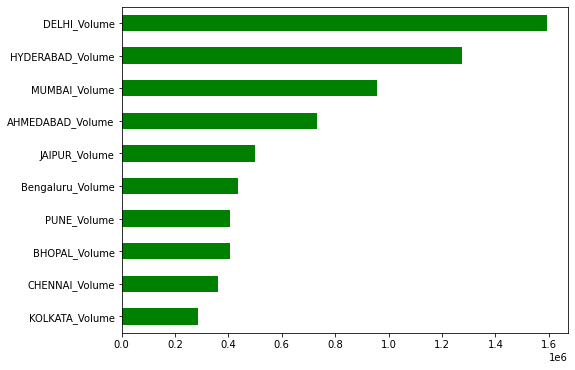

In [19]:
Volume.sort_values(inplace=True)
Volume.plot(kind='barh',y='Mandi Tomato Volume from 2015-2020',x='Mandi',color='g')

# Line Plot for wholesale price

In [22]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot
import plotly.graph_objs as go

DelhiWholesale = go.Scatter(
x=df2.Date,
y=df2.DELHI_WholesalePrice,
name="Delhi")

HyderabadWholesale = go.Scatter(
x=df2.Date,
y=df2.HYDERABAD_WholesalePrice,
name="Hyderabad")

MumbaiWholesale = go.Scatter(
x=df2.Date,
y=df2.MUMBAI_WholesalePrice,
name="Mumbai")

AhmWholesale = go.Scatter(
x=df2.Date,
y=df2.AHMEDABAD_WholesalePrice,
name="Ahemdabad")

JaipurWholesale = go.Scatter(
x=df2.Date,
y=df2.JAIPUR_WholesalePrice,
name="Jaipur")

BengaluruWholesale = go.Scatter(
x=df2.Date,
y=df2.Bengaluru_WholesalePrice,
name="Bengaluru")

PuneWholesale = go.Scatter(
x=df2.Date,
y=df2.PUNE_WholesalePrice,
name="Pune")

BhoWholesale = go.Scatter(
x=df2.Date,
y=df2.BHOPAL_WholesalePrice,
name="Bhopal")

ChenWholesale = go.Scatter(
x=df2.Date,
y=df2.CHENNAI_WholesalePrice,
name="Chennai")

KolWholesale = go.Scatter(
x=df2.Date,
y=df2.KOLKATA_WholesalePrice,
name="Kolkata")

data = [DelhiWholesale, HyderabadWholesale, MumbaiWholesale,AhmWholesale,JaipurWholesale,BengaluruWholesale,PuneWholesale,BhoWholesale,ChenWholesale,KolWholesale]

layout = go.Layout(
xaxis=dict(

    zeroline=True,
    showline=True,
    mirror='ticks',
    gridcolor='#bdbdbd',
    gridwidth=2,
    zerolinecolor='#969696',
    zerolinewidth=4,
    linecolor='#636363',
    linewidth=6
),
yaxis=dict(

    zeroline=True,
    showline=True,
    mirror='ticks',
    gridcolor='#bdbdbd',
    gridwidth=2,
    zerolinecolor='#969696',
    zerolinewidth=4,
    linecolor='#636363',
    linewidth=6
)
)
fig = go.Figure(data=data, layout=layout)
plot(fig)


'temp-plot.html'

# Line plot for Retail price

In [21]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot
import plotly.graph_objs as go

DelhiRetail = go.Scatter(
x=df2.Date,
y=df2.DELHI_RetailPrice,
name="Delhi")

HyderabadRetail = go.Scatter(
x=df2.Date,
y=df2.HYDERABAD_RetailPrice,
name="Hyderabad")

MumbaiRetail = go.Scatter(
x=df2.Date,
y=df2.MUMBAI_RetailPrice,
name="Mumbai")

AhmRetail = go.Scatter(
x=df2.Date,
y=df2.AHMEDABAD_RetailPrice,
name="Ahemdabad")

JaipurRetail = go.Scatter(
x=df2.Date,
y=df2.JAIPUR_RetailPrice,
name="Jaipur")

BengaluruRetail = go.Scatter(
x=df2.Date,
y=df2.Bengaluru_RetailPrice,
name="Bengaluru")

PuneRetail = go.Scatter(
x=df2.Date,
y=df2.PUNE_RetailPrice,
name="Pune")

BhoRetail = go.Scatter(
x=df2.Date,
y=df2.BHOPAL_RetailPrice,
name="Bhopal")

ChenRetail = go.Scatter(
x=df2.Date,
y=df2.CHENNAI_RetailPrice,
name="Chennai")

KolRetail = go.Scatter(
x=df2.Date,
y=df2.KOLKATA_RetailPrice,
name="Kolkata")

data = [DelhiRetail, HyderabadRetail, MumbaiRetail,AhmRetail,JaipurRetail,BengaluruRetail,PuneRetail,BhoRetail,ChenRetail,KolRetail]

layout = go.Layout(
xaxis=dict(

    zeroline=True,
    showline=True,
    mirror='ticks',
    gridcolor='#bdbdbd',
    gridwidth=2,
    zerolinecolor='#969696',
    zerolinewidth=4,
    linecolor='#636363',
    linewidth=6
),
yaxis=dict(

    zeroline=True,
    showline=True,
    mirror='ticks',
    gridcolor='#bdbdbd',
    gridwidth=2,
    zerolinecolor='#969696',
    zerolinewidth=4,
    linecolor='#636363',
    linewidth=6
)
)
fig = go.Figure(data=data, layout=layout)
plot(fig)

'temp-plot.html'